# 2. Problem nierównomierności klas (_imbalanced data_)

https://svds.com/learning-imbalanced-classes/

Podejścia:

- manipulacja progiem klasyfikacji 
- wykorzystanie ważonej funkcji celu podczas uczenia modeli
- over-sampling
- under-sampling
- data augmentation - sztuczne tworzenie nowych obserwacji (przede wszystkim przy pracy z obrazami)
- podejścia inne niż klasyfikacja (detekcja obserwacji nietypowych, własne heurystyki)

<br>

<br>


# Case study: detekcja nadużyć

Problem rozpoznawanie czy dana transakcja finansowa jest oszustwem (*fraud detection*).



Opis danych:

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount.

In [2]:
pip install numpy==1.19.3

  Attempting uninstall: numpy


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Odmowa dostępu: 'C:\\Users\\Basia\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

RuntimeError: The current Numpy installation ('c:\\users\\basia\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\numpy\\__init__.py') fails to pass a sanity check due to a bug in the windows runtime. See this issue for more information: https://tinyurl.com/y3dm3h86

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv("Dane/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


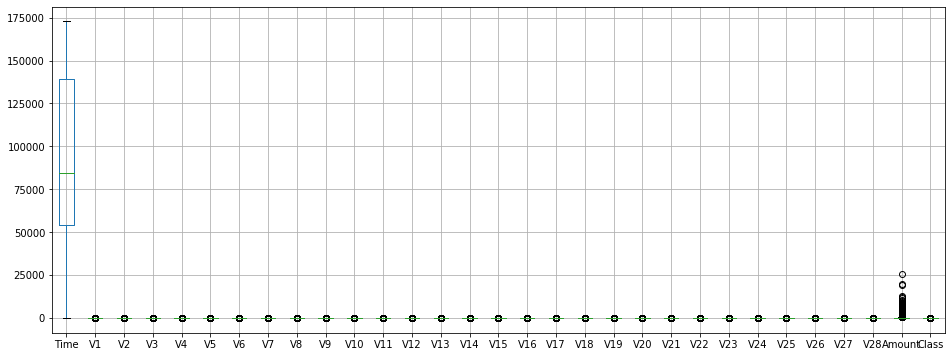

In [4]:
data.boxplot(figsize=(16, 6))

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Przygotowanie zbioru 

In [6]:
data.drop('Time', axis=1, inplace=True)

In [7]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


(-100, 3000)

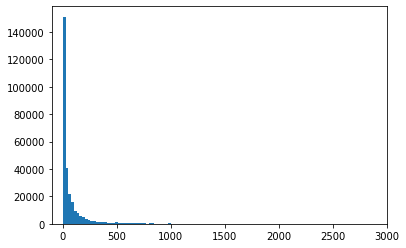

In [8]:
_ = plt.hist(data.Amount, bins=1000)
plt.xlim(left=-100, right=3000)

(-100, 3000)

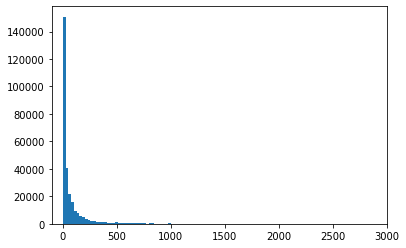

In [9]:
_ = plt.hist(data.Amount[data.Class == 0], bins=1000)
plt.xlim(left=-100, right=3000)

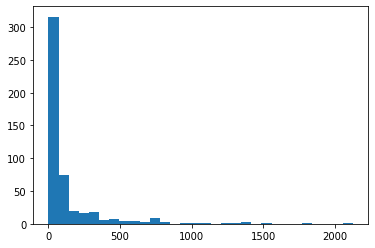

In [10]:
_ = plt.hist(data.Amount[data.Class == 1], bins=30)

In [11]:
log_vals = np.log10(data.Amount + 1)

(0, 3000)

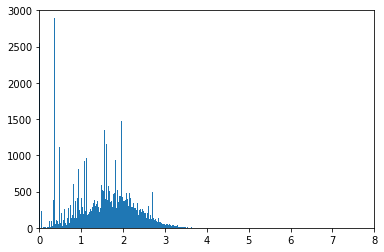

In [12]:
_ = plt.hist(log_vals, bins=1000)
plt.xlim(left=0, right=8)
plt.ylim(bottom=0, top=3000)

In [13]:
data.Amount = log_vals

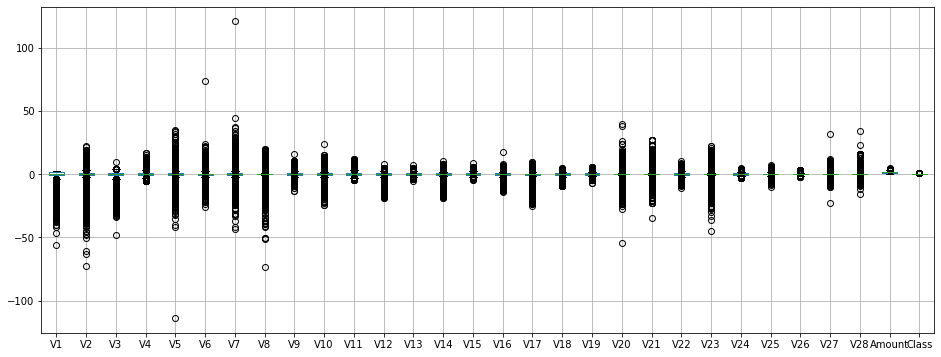

In [14]:
data.boxplot(figsize=(16, 6))

In [15]:
X = data.drop('Class', axis=1, inplace=False).values
y = data.Class.values

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
# metoda sama dba o proporcjonalne losowanie klas

In [20]:
y_train.mean()

0.001755582753155033

In [21]:
y_test.mean()

0.001661926664559999

### Przechodzimy do modelowania.

Ważne: Każdą analizę zawsze zaczynamy od określenia punktu odniesienia! Sprawdzamy jak działa najprostszy model (kilka prostych modeli) - bez kombinowania z danymi, na domyślnych parametrach.

In [22]:
from sklearn.model_selection import cross_val_predict, \
StratifiedKFold # w przeciwieństwie do KFold, losuje próbki proporcjonalnnie do liczności klas w każdym foldzie

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

In [24]:
model = LogisticRegression()

y_pred = cross_val_predict(model, 
                           X_train, 
                           y_train, 
                           cv=StratifiedKFold(n_splits=5),
                           method='predict_proba')[:, 1]

In [25]:
y_pred

array([1.13266673e-04, 2.14795833e-04, 5.16137632e-04, ...,
       2.01638672e-04, 2.20917546e-04, 5.96178029e-05])

In [26]:
y_pred > 0.001

array([False, False, False, ..., False, False, False])

In [27]:
roc_auc_score(y_train, y_pred)

0.9765352760538024

In [28]:
accuracy_score(y_train, (y_pred > 0.5)) # bezwartościowa informacja gdy klasy są niezbalansowane

0.9991723681306555

In [29]:
f1_score(y_train, (y_pred > 0.5))

0.7245409015025042

In [30]:
recall_score(y_train, (y_pred > 0.5)) # spośród wszystkich fraudów model znalazł 62.4% 

0.62

In [31]:
precision_score(y_train, (y_pred > 0.5)) # Spośród wybredykowanych fraudów, 86.8% było faktycznymi farudami

0.8714859437751004

In [32]:
print(accuracy_score(y_train, np.zeros(y_train.shape))) # gdy nasz model zwraca same 0
print(f1_score(y_train, np.zeros(y_train.shape)))

0.998244417246845
0.0


C:\Users\Waldemar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### 0. Modyfikacja progu odcięcia

Regresja logistyczna

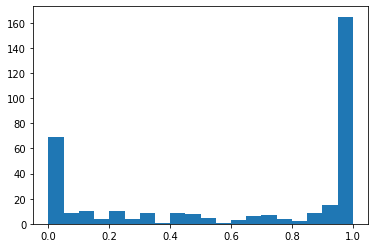

In [33]:
_ = plt.hist(y_pred[y_train == 1], bins=20)

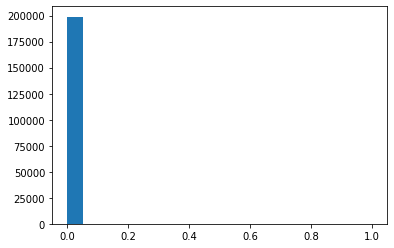

In [34]:
_ = plt.hist(y_pred[y_train == 0], bins=20)

In [35]:
def get_scores_for_thresholds(y_true, y_pred_proba, thresholds=None):
    if not thresholds:
        thresholds = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999]
    
    f1_scores = []
    precision_scores = []
    recall_scores = []

    for t in thresholds:
        precision_scores.append(precision_score(y_true, (y_pred_proba > t)))
        recall_scores.append(recall_score(y_true, (y_pred_proba > t)))
        f1_scores.append(f1_score(y_true, (y_pred_proba > t)))

    return pd.DataFrame({
        'thresholds': thresholds,
        'F1': f1_scores,
        'PPV': precision_scores,
        'TPR': recall_scores
    })

In [36]:
scores_df = get_scores_for_thresholds(y_train, y_pred)

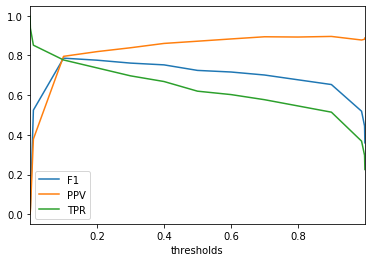

In [37]:
scores_df.plot(x='thresholds', y=['F1', 'PPV', 'TPR'])

In [38]:
scores_df[scores_df['F1'] == scores_df['F1'].max()]

,thresholds,F1,PPV,TPR
3,0.1,0.786127,0.795322,0.777143


In [39]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred_test_proba = model.predict_proba(X_test)[:, 1]

In [41]:
y_pred_test = (y_pred_test_proba > 0.1).astype(int)

### 1. Ważona funkcja celu

Regresja logistyczna

In [42]:
model = LogisticRegression(class_weight={
    0: 1.,
    1: 500 
}) # zwrcaj uwagę 500 x bardziej na klasę 1 niż na klasę 2
y_pred_proba = cross_val_predict(model, 
                                 X_train, 
                                 y_train, 
                                 cv=StratifiedKFold(n_splits=5),
                                 method='predict_proba')[:, 1]

In [43]:
roc_auc_score(y_train, y_pred_proba)

0.9772285797553366

In [44]:
f1_score(y_train, (y_pred_proba > 0.5))

0.12263787119166987

In [45]:
scores_df = get_scores_for_thresholds(y_train, y_pred_proba)
scores_df

,thresholds,F1,PPV,TPR
0,0.0001,0.003689,0.001848,1.000000
1,0.0010,0.003821,0.001914,0.997143
2,0.0100,0.004916,0.002464,0.988571
3,0.1000,0.019131,0.009661,0.962857
4,0.2000,0.037740,0.019253,0.948571
5,0.3000,0.059597,0.030796,0.920000
6,0.4000,0.088410,0.046451,0.914286
7,0.5000,0.122638,0.065757,0.908571
8,0.6000,0.164241,0.090337,0.902857
9,0.7000,0.216084,0.123108,0.882857


In [46]:
scores_df[scores_df['F1'] == scores_df['F1'].max()]

,thresholds,F1,PPV,TPR
14,0.9999,0.784703,0.77809,0.791429


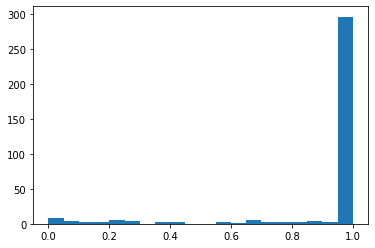

In [47]:
_ = plt.hist(y_pred_proba[y_train == 1], bins=20)

Sprawdzamy model na zbiorze testowym

In [48]:
model = LogisticRegression(class_weight={
    0: 1.,
    1: 500 
})

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 500}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred_test_proba = model.predict_proba(X_test)[:, 1]

In [50]:
y_pred_test = (y_pred_test_proba > 0.9999).astype(int)

In [51]:
f1_score(y_test, y_pred_test)

0.795847750865052

In [52]:
recall_score(y_test, y_pred_test)

0.8098591549295775

In [53]:
precision_score(y_test, y_pred_test)

0.782312925170068

In [54]:
from sklearn.ensemble import RandomForestClassifier

### 2. Undersamplig

Uwaga: w praktyce dobrze jest sterować losowaniem tak, żeby losować różne obserwacje.

In [55]:
from copy import deepcopy

In [56]:
def cv_undersampling(X, y, model, size=1, cv=StratifiedKFold(5)):
    # size - stosunek liczby obserwacji klasy 0 do klasy 1
    y_pred_proba = []
    y_true = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx, :], X[test_idx, :]
        y_train, y_test = y[train_idx], y[test_idx]
    
        # pobierz wszystkie indeksy klasy 0  w zbiorze treningowym
        class_0_indices = np.where(y_train == 0)[0]
        
        # sprawdź liczność klasy 1 w zbiorze treningowym
        class_1_amount = np.sum((y_train==1).astype(int))
        # LUB  y_train[y_train==1].shape[0]
        
        # wyznacz liczbę wymaganych obserwacji klasy 0 w oparciu o współczynnik size
        class_0_indices_number = int(size * class_1_amount)
        
        # wylosuj class_0_indices_number-elementowy podzbiór indeksów klasy 0 z wszystkich dostępnych próbek klasy 0
        idx0 = np.random.choice(class_0_indices, class_0_indices_number, replace=False)
        
        # pobierz wszystkie indeksy klasy 1
        idx1 = np.where(y_train == 1)[0]
        
        # połącz wybrane indeksy klasy 0 i 1
        idx_all = np.r_[idx0, idx1]
        
        # wyznacz podzbiór obserwacji ze zbioru treningowego
        X_train_sub = X_train[idx_all, :]
        y_train_sub = y_train[idx_all]
        
        # zadbaj o nienadpisywanie się modelu
        model_tmp = deepcopy(model)
        
        # naucz model i wykonaj predyckję
        model_tmp.fit(X_train_sub, y_train_sub)
        y_pred = model_tmp.predict_proba(X_test)[:, 1]
        
        # Dodaj predykcję i warotści rzeczywiste do konteknerów
        y_pred_proba.extend(y_pred.tolist())
        y_true.extend(y_test.tolist())
    
    return np.array(y_pred_proba), np.array(y_true)

In [57]:
y_pred_proba, y_true = cv_undersampling(X=X_train,
                                        y=y_train,
                                        model=LogisticRegression(), 
                                        size=10,
                                        cv=StratifiedKFold(5))

In [58]:
scores_df = get_scores_for_thresholds(y_true, y_pred_proba)
scores_df

,thresholds,F1,PPV,TPR
0,0.0001,0.003570,0.001788,1.000000
1,0.0010,0.003889,0.001948,0.997143
2,0.0100,0.010976,0.005519,0.980000
3,0.1000,0.109765,0.058422,0.905714
4,0.2000,0.208333,0.118050,0.885714
5,0.3000,0.281612,0.168049,0.868571
6,0.4000,0.361128,0.228550,0.860000
7,0.5000,0.441636,0.298492,0.848571
8,0.6000,0.519824,0.375796,0.842857
9,0.7000,0.592965,0.457364,0.842857


### 3. Oversampling.

Uwaga: obliczenia trwają dłużej.

In [59]:
def cv_oversampling(X, y, model, size=1, cv=StratifiedKFold(5)):
    # size - stosunek liczby obserwacji klasy 0 do klasy 1
    y_pred_proba = []
    y_true = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx, :], X[test_idx, :]
        y_train, y_test = y[train_idx], y[test_idx]
    
        # pobierz wszystkie indeksy klasy 1 w zbiorze treningowym
        class_1_indices = np.where(y_train == 1)[0]
        
        # sprawdź liczność klasy 0 w zbiorze treningowym
        class_0_amount = np.sum((y_train==0).astype(int))
        # LUB  y_train[y_train==1].shape[0]
        
        # wyznacz liczbę wymaganych obserwacji klasy 1 w oparciu o współczynnik size
        class_1_indices_number = class_0_amount // size
        
        # rozbuduj werktor obserwacji klasy 1 zgodnie z wymaganym rozmiarem
        idx1 = np.resize(class_1_indices, class_1_indices_number)
        # TODO zaprponuj lepsza randomizajcę nakładania się indeksów
        
        # pobierz wszystkie indeksy klasy 0
        idx0 = np.where(y_train == 0)[0]
        
        # połącz wybrane indeksy klasy 0 i 1
        idx_all = np.r_[idx0, idx1]
        
        # wyznacz podzbiór obserwacji ze zbioru treningowego
        X_train_sub = X_train[idx_all, :]
        y_train_sub = y_train[idx_all]
        
        # zadbaj o nienadpisywanie się modelu
        model_tmp = deepcopy(model)
        
        # naucz model i wykonaj predyckję
        model_tmp.fit(X_train_sub, y_train_sub)
        y_pred = model_tmp.predict_proba(X_test)[:, 1]
        
        # Dodaj predykcję i warotści rzeczywiste do konteknerów
        y_pred_proba.extend(y_pred.tolist())
        y_true.extend(y_test.tolist())
    
    return np.array(y_pred_proba), np.array(y_true)

In [60]:
# y_pred_proba, y_true = cv_oversampling(X=X_train,
#                                         y=y_train,
#                                         model=LogisticRegression(), 
#                                         size=10,
#                                         cv=StratifiedKFold(5))

In [61]:
scores_df = get_scores_for_thresholds(y_true, y_pred_proba)
scores_df

,thresholds,F1,PPV,TPR
0,0.0001,0.003570,0.001788,1.000000
1,0.0010,0.003889,0.001948,0.997143
2,0.0100,0.010976,0.005519,0.980000
3,0.1000,0.109765,0.058422,0.905714
4,0.2000,0.208333,0.118050,0.885714
5,0.3000,0.281612,0.168049,0.868571
6,0.4000,0.361128,0.228550,0.860000
7,0.5000,0.441636,0.298492,0.848571
8,0.6000,0.519824,0.375796,0.842857
9,0.7000,0.592965,0.457364,0.842857


### Zadanie: modyfikowany undersampling

Opis algorytmu: k-krotnie dokonujemy predykcji przy użyciu undersamplingu, a następnie ostateczna predykcja to średnia z prawdopodobieństw k predykcji.

In [62]:
def cv_repeated_undersampling(X, y, model, n_estimators=20, size=1, cv=StratifiedKFold(5)):
    # size - stosunek liczby obserwacji klasy 0 do klasy 1
    y_pred_proba = []
    y_true = []
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx, :], X[test_idx, :]
        y_train, y_test = y[train_idx], y[test_idx]
    
        # pobierz wszystkie indeksy klasy 0  w zbiorze treningowym
        class_0_indices = np.where(y_train == 0)[0]
        
        # sprawdź liczność klasy 1 w zbiorze treningowym
        class_1_amount = np.sum((y_train==1).astype(int))
        # LUB  y_train[y_train==1].shape[0]
        
        # wyznacz liczbę wymaganych obserwacji klasy 0 w oparciu o współczynnik size
        class_0_indices_number = int(size * class_1_amount)
        
        # swtórz kontener na wyniki z n modeli w ramach jednego folda
        y_pred_proba_n_models = np.zeros((n_estimators, len(y_test)))
        
        for i in range(n_estimators):
            # wylosuj class_0_indices_number-elementowy podzbiór indeksów klasy 0 z wszystkich dostępnych próbek klasy 0
            idx0 = np.random.choice(class_0_indices, class_0_indices_number, replace=False)

            # pobierz wszystkie indeksy klasy 1
            idx1 = np.where(y_train == 1)[0]

            # połącz wybrane indeksy klasy 0 i 1
            idx_all = np.r_[idx0, idx1]

            # wyznacz podzbiór obserwacji ze zbioru treningowego
            X_train_sub = X_train[idx_all, :]
            y_train_sub = y_train[idx_all]

            # zadbaj o nienadpisywanie się modelu
            model_tmp = deepcopy(model)

            # naucz model i wykonaj predyckję
            model_tmp.fit(X_train_sub, y_train_sub)
            y_pred = model_tmp.predict_proba(X_test)[:, 1]
            
            # przypisz predykcję z obecnego modelu do kontenera
            y_pred_proba_n_models[i, :] = y_pred
            
        # oblicz średnie prawdopodobieństwa wyboru klasy z n_modeli
        y_pred_proba_n_models_mean = y_pred_proba_n_models.mean(0)

        # Dodaj predykcję i wartości rzeczywiste do konteknerów
        y_pred_proba.extend(y_pred_proba_n_models_mean.tolist())
        y_true.extend(y_test.tolist())
    
    return np.array(y_pred_proba), np.array(y_true)

In [63]:
y_pred_proba, y_true = cv_repeated_undersampling(X=X_train,
                                                 y=y_train,
                                                 model=LogisticRegression(), 
                                                 size=10,
                                                 n_estimators=100,
                                                 cv=StratifiedKFold(5))

In [64]:
scores_df = get_scores_for_thresholds(y_true, y_pred_proba)
scores_df

,thresholds,F1,PPV,TPR
0,0.0001,0.003539,0.001773,1.000000
1,0.0010,0.003812,0.001910,1.000000
2,0.0100,0.010584,0.005321,0.982857
3,0.1000,0.111189,0.059206,0.911429
4,0.2000,0.219866,0.125454,0.888571
5,0.3000,0.307146,0.186691,0.865714
6,0.4000,0.404040,0.264317,0.857143
7,0.5000,0.513793,0.367901,0.851429
8,0.6000,0.605749,0.472756,0.842857
9,0.7000,0.681395,0.574510,0.837143


In [65]:
# %%time
# y_pred_proba, y_true = cv_repeated_undersampling(X=X_train,
#                                                  y=y_train,
#                                                  model=RandomForestClassifier(n_estimators=200), 
#                                                  size=10,
#                                                  n_estimators=100,
#                                                  cv=StratifiedKFold(5))

In [66]:
scores_df = get_scores_for_thresholds(y_true, y_pred_proba)
scores_df

,thresholds,F1,PPV,TPR
0,0.0001,0.003539,0.001773,1.000000
1,0.0010,0.003812,0.001910,1.000000
2,0.0100,0.010584,0.005321,0.982857
3,0.1000,0.111189,0.059206,0.911429
4,0.2000,0.219866,0.125454,0.888571
5,0.3000,0.307146,0.186691,0.865714
6,0.4000,0.404040,0.264317,0.857143
7,0.5000,0.513793,0.367901,0.851429
8,0.6000,0.605749,0.472756,0.842857
9,0.7000,0.681395,0.574510,0.837143


# Braki danych

### Jak obsługiwać braki danych?

### Propozycja (w przypadku zmiennej numerycznej):

1. Gdy dla danej zmiennej braków jest bardzo mało (np. 2% zbioru), wyrzucić obserwacje zawieracjące te braki.

2. Gdy dla danej zmiennej braków jest bardzo dużo (ponad 60%), usunąć z danych tę zmienną

3. W pozostałych przypadkach uzupełnić braki średnią.


<br>

<br>

<br>

<br>

<br>

<br>

### Nie, nie, nie i jeszcze raz nie.

# Podejście rzetelne:

1) Spróbować wyjaśnić pochodzenie braków
  - może wynikają z błędu w jakimś systemie -> trzeba naprawić system
  - może ktoś nie wiedzał jakie wartości wprowadzić -> trzeba stworzyć lepszą (jakąkolwiek) dokumentację/instrukcję
  - itd.
  - jak to wygląda w praktyce? ...
  - wyjaśnienie jest super, ale często nierealizowalne (co nie znaczy, że nie warto próbować), dlatego trzeba sobie radzić
  
2) Spróbować wyjaśnić znaczenie braku
  - brak w kolumnie "liczba dzieci" -> może oznaczać wartość 0
  - brak w kolumnie "wykształcenie" -> może oznaczać, że osoba nie ma nawet podstawowego
  - brak może wynikać z wartości innej zmiennej -> czy posiadasz dzieci - nie, liczba dzieci - brak
  - wówczas braki możemy uzupełnić 
  
3) Jeżeli rozważamy zmienną kategoryczną:
  - warto rozważyć nadanie brakom klasy "brak" i traktować ją jak normalna wartość
  - można tez upełnić wartością występującą najczęściej lub wartością losową
  - jeżeli braki stanowią przytłaczającą większość -> można zamienić zmienną na binarną o wartości 1, gdy wystepuje brak lub 0 wpp.

4) Jeżeli rozważamy zmienną numeryczną:
  - można uzupełnić średnią -> gdy zmienna ma rozkład symetryczny
  - można uzupełnić medianą lub modą -> gdy zmienna ma rozkład skośny  
  - można tez upełnić wartością występującą wartością losową (z rozsądnego rozkładu)
  - jeżeli braki stanowią przytłaczającą większość -> można zamienić zmienną na binarną o wartości 1, gdy wystepuje brak lub 0 wpp.
  - można skategoryzować zmienną - wartości numeryczne pogrupować na przedziały i dodać kategorię "brak"
  - uzupełnić braki i jednocześnie dodać do danych zmienną binarną o wartości 1, gdy wystepuje brak lub 0 wpp.
  - jeżeli dane są zależne od czasu, można uzupełnić wartością poprzednią/ średnią z porzednich kilku wartości, wartością, która zachowałaby trend z poprzednich kilku wartości
  
5) Usunąć obserwacje z brakiem jeśli jest ich mało

6) Usunąć zmienną jeśli braków jest dużo

7) Uzupełnić używając modelu predykcyjnego z wykorzystaniem pozostałych zmiennych (jeżeli dane zależne od czasu, to można uzupełnić predykcją na podstawie poprzednich wartości tej i inyych zmiennych)


# Case study 

Dane: HappyCustomerBank


### Opis problemu i danych:

About Company

Happy Customer Bank is a mid-sized private bank which deals in all kinds of loans. They have presence across all major cities in India and focus on lending products. They have a digital arm which sources customers from the internet.


Problem

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.

In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.

Data Set

We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.


Input variables:

- ID - Unique ID (can not be used for predictions)
- Gender- Sex
- City - Current City
- Monthly_Income - Monthly Income in rupees
- DOB - Date of Birth
- Lead_Creation_Date - Lead Created on date
- Loan_Amount_Applied - Loan Amount Requested (INR)
- Loan_Tenure_Applied - Loan Tenure Requested (in years)
- Existing_EMI - EMI of Existing Loans (INR)
- Employer_Name - Employer Name
- Salary_Account- Salary account with Bank
- Mobile_Verified - Mobile Verified (Y/N)
- Var5- Continuous classified variable
- Var1- Categorical variable with multiple levels
- Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
- Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
- Interest_Rate- Interest Rate of Submitted Loan Amount
- Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
- EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
- Filled_Form- Filled Application form post quote
- Device_Type- Device from which application was made (Browser/ Mobile)
- Var2- Categorical Variable with multiple Levels
- Source- Categorical Variable with multiple Levels
- Var4- Categorical Variable with multiple Levels

Outcomes:

- LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
- Disbursed- Loan Disbursed (Target Variable)

Źródło:

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

### Interesują nas dwie miary jakości rozwiązania: 
- AUC
- Zysk, liczony w następujący sposób:

  - zaklasyfikowanie obserwacji jako 1 kosztuje nas 100 zł (tzn. nasz model przypisuje obserwacji klasę 1),
  - trafienie predykcją w klasę 1 przynosi nam 1000 zł zarobku.

Cel: osiągnąć jak największy zysk.

In [67]:
import pandas as pd
data = pd.read_csv('Dane/HappyCustomerBank/Train_nyOWmfK.csv',encoding="latin1")
print(data.shape)

(87020, 26)


In [68]:
data = pd.read_csv('Dane/HappyCustomerBank/Train_nyOWmfK.csv', encoding="latin1")
# data_test = pd.read_csv('Dane/HappyCustomerBank/Test_bCtAN1w.csv', encoding="latin1")

In [69]:
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


### 1. Exploracyjna analiza danych 

In [70]:
import seaborn as sns

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [72]:
data.isna().sum()

ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                     0
Disbursed                    0
dtype: int64

#### Zmienna objaśniana - Disbursed

In [73]:
disbursed_counts = data['Disbursed'].value_counts()
disbursed_counts

0    85747
1     1273
Name: Disbursed, dtype: int64

In [74]:
disbursed_counts[0] / disbursed_counts[1] # silnie niezbalansowane klasy

67.35820895522389

Przed analizą wszystkich zmiennych objaśniających, stworzymy kontener na nazwy zmiennych kategorycznych, które później zamienimy na one-hot encoding.

In [75]:
CATEGORICAL_FEATURES = []

Zmienna **Gender**

In [76]:
data['Gender'].isna().sum() # nie ma braków w danych

0

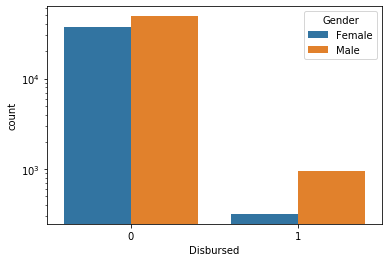

In [77]:
sns.countplot(x='Disbursed', hue='Gender', data=data) # plotly
plt.yscale('log')

In [78]:
CATEGORICAL_FEATURES.append('Gender')

Zmienna **City**

In [79]:
data['City'].isna().sum()

1003

In [80]:
data['City'].value_counts()

Delhi         12527
Bengaluru     10824
Mumbai        10795
Hyderabad      7272
Chennai        6916
              ...  
Sheopur           1
Himatnagar        1
Lohit             1
CHOTILA           1
Tonk              1
Name: City, Length: 697, dtype: int64

In [81]:
# uzupełniamy braki wartością 'NotGiven'
data['City'].fillna('NotGiven', inplace=True)

In [82]:
data['City'].isna().sum()

0

In [83]:
data['City'].value_counts().iloc[:20]

Delhi            12527
Bengaluru        10824
Mumbai           10795
Hyderabad         7272
Chennai           6916
Pune              5207
Kolkata           2888
Ahmedabad         1788
Jaipur            1331
Gurgaon           1212
Coimbatore        1147
NotGiven          1003
Thane              905
Chandigarh         870
Surat              802
Visakhapatnam      764
Indore             734
Vadodara           624
Nagpur             594
Lucknow            580
Name: City, dtype: int64

In [84]:
# weźmy 20 najczęściej występujących miast
frequent_cities = data['City'].value_counts().index[:20].tolist()
frequent_cities

['Delhi',
 'Bengaluru',
 'Mumbai',
 'Hyderabad',
 'Chennai',
 'Pune',
 'Kolkata',
 'Ahmedabad',
 'Jaipur',
 'Gurgaon',
 'Coimbatore',
 'NotGiven',
 'Thane',
 'Chandigarh',
 'Surat',
 'Visakhapatnam',
 'Indore',
 'Vadodara',
 'Nagpur',
 'Lucknow']

In [85]:
data['City']

0            Delhi
1           Mumbai
2        Panchkula
3          Saharsa
4        Bengaluru
           ...    
87015        Ajmer
87016        Kochi
87017    Bengaluru
87018    Bengaluru
87019       Mumbai
Name: City, Length: 87020, dtype: object

In [86]:
def convert_city(city):
    if city in frequent_cities:
        return city
    else:
        return "Other"

data['City'] = data['City'].apply(convert_city)

In [87]:
data['City'].value_counts().iloc[:22]

Other            18237
Delhi            12527
Bengaluru        10824
Mumbai           10795
Hyderabad         7272
Chennai           6916
Pune              5207
Kolkata           2888
Ahmedabad         1788
Jaipur            1331
Gurgaon           1212
Coimbatore        1147
NotGiven          1003
Thane              905
Chandigarh         870
Surat              802
Visakhapatnam      764
Indore             734
Vadodara           624
Nagpur             594
Lucknow            580
Name: City, dtype: int64

In [88]:
CATEGORICAL_FEATURES.append('City')

Zmienna **Monthly_Income**

In [89]:
data['Monthly_Income'].isna().sum() # nie ma braków w danych

0

In [90]:
data['Monthly_Income'].describe()

count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64

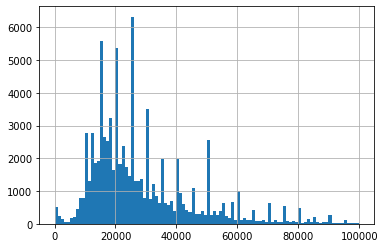

In [91]:
data['Monthly_Income'][data['Monthly_Income'] < 10e4].hist(bins=100)

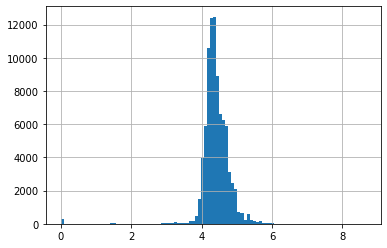

In [92]:
# przekształcamy logarytmicznie zbiór

data['Monthly_Income_Log'] = np.log10(data['Monthly_Income'] + 1)
data['Monthly_Income_Log'].hist(bins=100)

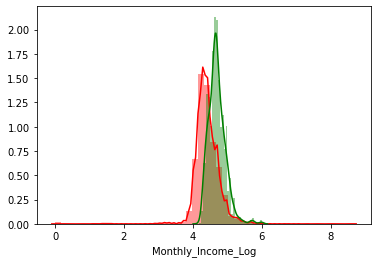

In [93]:
sns.distplot(data['Monthly_Income_Log'][data['Disbursed'] == 0], color='r')
sns.distplot(data['Monthly_Income_Log'][data['Disbursed'] == 1], color='g')

Zmienna **DOB**

In [94]:
data['DOB'].isna().sum()

0

In [95]:
data['YOB'] = data['DOB'].apply(lambda date: int(date[-2:]))

In [96]:
data['YOB'].describe()

count    87020.000000
mean        84.095829
std          7.147194
min         15.000000
25%         81.000000
50%         86.000000
75%         89.000000
max         97.000000
Name: YOB, dtype: float64

In [97]:
# więc wszyscy urodzili się w 1900 +

In [98]:
data['YOB'] += 1900

In [99]:
data['YOB']

0        1978
1        1985
2        1981
3        1987
4        1984
         ... 
87015    1969
87016    1990
87017    1972
87018    1977
87019    1988
Name: YOB, Length: 87020, dtype: int64

In [100]:
data.drop('DOB', axis=1, inplace=True)

Zmienna **Lead_Creation_Date**

In [101]:
data['Lead_Creation_Date'].isna().sum()

0

In [102]:
data['Year_Of_Lead_Creation_Date'] = data['Lead_Creation_Date'].apply(lambda date: int(date[-2:]))

In [103]:
data['Year_Of_Lead_Creation_Date'].describe()

count    87020.0
mean        15.0
std          0.0
min         15.0
25%         15.0
50%         15.0
75%         15.0
max         15.0
Name: Year_Of_Lead_Creation_Date, dtype: float64

In [104]:
data['Year_Of_Lead_Creation_Date'] += 2000

In [105]:
# tworzymy zmienną Age

In [106]:
data['Age'] = data['Year_Of_Lead_Creation_Date'] - data['YOB']
data['Age'].head()

0    37
1    30
2    34
3    28
4    31
Name: Age, dtype: int64

In [107]:
data.drop('YOB', axis=1, inplace=True)
data.drop('Lead_Creation_Date', axis=1, inplace=True)
data.drop('Year_Of_Lead_Creation_Date', axis=1, inplace=True)

Zmienna **Age**

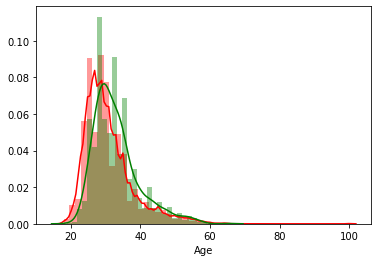

In [108]:
sns.distplot(data['Age'][data['Disbursed'] == 0], color='r')
sns.distplot(data['Age'][data['Disbursed'] == 1], color='g')

In [109]:
data

,ID,Gender,City,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Monthly_Income_Log,Age
0,ID000002C20,Female,Delhi,20000,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,...,NaN,N,Web-browser,G,S122,1,0,0,4.301052,37
1,ID000004E40,Male,Mumbai,35000,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,...,6762.90,N,Web-browser,G,S122,3,0,0,4.544080,30
2,ID000007H20,Male,Other,22500,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,...,NaN,N,Web-browser,B,S143,1,0,0,4.352202,34
3,ID000008I30,Male,Other,35000,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,...,NaN,N,Web-browser,B,S143,3,0,0,4.544080,28
4,ID000009J40,Male,Bengaluru,100000,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,...,NaN,N,Web-browser,B,S134,3,1,0,5.000004,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,ID124813N30,Female,Other,71901,1000000.0,5.0,14500.0,MAYO COLLEGE,ICICI Bank,N,...,NaN,N,Web-browser,G,S122,3,0,0,4.856741,46
87016,ID124814O40,Female,Other,16000,0.0,0.0,0.0,KERALA COMMUNICATORS CABLE LTD,Federal Bank,Y,...,9425.76,Y,Mobile,G,S122,5,0,0,4.204147,25
87017,ID124816Q10,Male,Bengaluru,118000,0.0,0.0,0.0,BANGALORE INSTITUTE OF TECHNOLOGY,Syndicate Bank,Y,...,NaN,N,Mobile,G,S122,3,0,0,5.071886,43
87018,ID124818S30,Male,Bengaluru,98930,800000.0,5.0,13660.0,FIRSTSOURCE SOLUTION LTD,ICICI Bank,Y,...,NaN,N,Web-browser,G,S122,3,0,0,4.995332,38


Zmienna **Loan_Amount_Applied**

In [110]:
data['Loan_Amount_Applied'].isna().sum()

71

In [111]:
data[data['Loan_Amount_Applied'].isna()]['Disbursed'].mean()

0.028169014084507043

In [112]:
data[~data['Loan_Amount_Applied'].isna()]['Disbursed'].mean()

0.014617764436623768

In [113]:
data['Loan_Amount_Applied'].value_counts()

0.0          28853
100000.0     14311
200000.0     13058
300000.0      9995
500000.0      9762
             ...  
560000.0         1
475000.0         1
460000.0         1
1405000.0        1
204000.0         1
Name: Loan_Amount_Applied, Length: 277, dtype: int64

In [114]:
data['Missing_Loan_Amount_Applied'] = (data['Loan_Amount_Applied'].isna() | (data['Loan_Amount_Applied'] == 0.0)).astype(int)

In [115]:
data['Missing_Loan_Amount_Applied']

0        0
1        0
2        0
3        0
4        0
        ..
87015    0
87016    1
87017    1
87018    0
87019    1
Name: Missing_Loan_Amount_Applied, Length: 87020, dtype: int32

In [116]:
data[data['Loan_Amount_Applied'] == 0.0]['Disbursed'].sum() # osoby nieubiegające się o pożyczkę ją dostają...?

277

In [117]:
data.loc[data['Loan_Amount_Applied'].isna(), 'Loan_Amount_Applied'] = 0.0

In [118]:
data['Loan_Amount_Applied'].isna().sum()

0

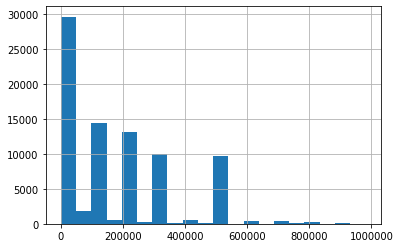

In [119]:
data['Loan_Amount_Applied'][data['Loan_Amount_Applied'] < 10e5].hist(bins=20)

Zmienna **Loan_Tenure_Applied**

In [120]:
data['Loan_Tenure_Applied'].isna().sum()

71

In [121]:
data['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [122]:
data['Missing_Loan_Tenure_Applied'] = (data['Loan_Tenure_Applied'].isna() | (data['Loan_Tenure_Applied'] == 0.0)).astype(int)

In [123]:
data.loc[data['Loan_Tenure_Applied'].isna(), 'Loan_Tenure_Applied'] = 0.0

In [124]:
data['Loan_Tenure_Applied'].isna().sum()

0

Zmienna **Existing_EMI**

In [125]:
data['Existing_EMI'].isna().sum()

71

In [126]:
# po przeanalizowaniu pozostałych brakujących wartości dochodzimy do wniosku, że 71 wybrakowanych wierszy jest do usunięcia
data[data['Existing_EMI'].isna()].T

,42858,43057,48356,49137,50104,51007,59351,61647,61865,67526,...,86155,86313,86377,86522,86579,86607,86693,86708,86774,86997
ID,ID061421J10,ID061704G40,ID069305P00,ID070459Z40,ID071821J10,ID073189Z40,ID085147X20,ID088412M20,ID088725N00,ID096931D10,...,ID123579B40,ID123808W30,ID123900K00,ID124106I10,ID124185J00,ID124227Z20,ID124354W40,ID124374Q40,ID124461Z10,ID124789P40
Gender,Male,Male,Male,Female,Male,Female,Female,Male,Female,Female,...,Male,Male,Male,Female,Male,Male,Female,Male,Female,Male
City,Other,Other,Pune,Thane,Pune,Pune,Mumbai,Pune,Pune,Nagpur,...,Bengaluru,Pune,Jaipur,Kolkata,Chennai,Kolkata,Chennai,Kolkata,Bengaluru,Delhi
Monthly_Income,40000,40000,25500,38000,38000,59000,18500,32000,22500,21240,...,42000,30000,300000,47500,30000,37000,30000,25000,38000,32000
Loan_Amount_Applied,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Loan_Tenure_Applied,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Existing_EMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employer_Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary_Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mobile_Verified,Y,Y,Y,N,Y,N,N,Y,N,N,...,Y,Y,Y,N,Y,Y,N,Y,Y,Y


In [127]:
data = data[~data['Existing_EMI'].isna()]

In [128]:
data['Existing_EMI'].isna().sum()

0

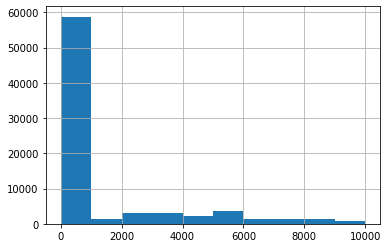

In [129]:
data['Existing_EMI'][data['Existing_EMI'] < 1e4].hist()

In [130]:
data['Existing_EMI'].value_counts()

0.0        58238
5000.0      2695
10000.0     1737
3000.0      1581
4000.0      1226
           ...  
11036.0        1
1703.0         1
2335.0         1
2936.0         1
1543.0         1
Name: Existing_EMI, Length: 3753, dtype: int64

In [131]:
data['Is_Existing_EMI'] = (data['Existing_EMI']  > 0).astype(int)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Zmienna **Employer_name**

In [132]:
data['Employer_Name'].isna().sum()

0

In [133]:
data['Employer_Name'].value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
SAPIENT                                            1
BRO                                                1
TRANSPOORT MANGER                                  1
PUDHUVAAZHUVU PROJECT                              1
VISHAL INTERPRISES                                 1
Name: Employer_Name, Length: 43567, dtype: int64

In [134]:
frequent_employers = data['Employer_Name'].value_counts()[data['Employer_Name'].value_counts() > 50].index.tolist()
frequent_employers

['0',
 'TATA CONSULTANCY SERVICES LTD (TCS)',
 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
 'ACCENTURE SERVICES PVT LTD',
 'GOOGLE',
 'HCL TECHNOLOGIES LTD',
 'ICICI BANK LTD',
 'INDIAN AIR FORCE',
 'INFOSYS TECHNOLOGIES',
 'GENPACT',
 'IBM CORPORATION',
 'INDIAN ARMY',
 'TYPE SLOWLY FOR AUTO FILL',
 'WIPRO TECHNOLOGIES',
 'HDFC BANK LTD',
 'IKYA HUMAN CAPITAL SOLUTIONS LTD',
 'STATE GOVERNMENT',
 'INDIAN RAILWAY',
 'INDIAN NAVY',
 'ARMY',
 'WIPRO BPO',
 'OTHERS',
 'TECH MAHINDRA LTD',
 'CONVERGYS INDIA SERVICES PVT LTD',
 'SERCO BPO PVT LTD',
 'IBM GLOBAL SERVICES INDIA LTD',
 'CONCENTRIX DAKSH SERVICES INDIA PVT LTD',
 'CAPGEMINI INDIA PVT LTD',
 'RANDSTAD INDIA LTD',
 'ADECCO INDIA PVT LTD',
 'CIPLA LTD',
 'WNS GLOBAL SERVICES PVT LTD',
 'SUTHERLAND GLOBAL SERVICES PVT LTD',
 'TCS ESERVE LTD (TATA CONSULTANCY SERVICES BPO)',
 'INDUSIND BANK LTD',
 'HEWLETT PACKARD GLOBALSOFT PVT LTD',
 'HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD',
 'WIPRO INFOTECH',
 'TEAM LEASE SERVICES PVT 

In [135]:
def convert_employer(emp):
    if emp in frequent_employers:
        return emp
    else:
        return "Other"

data['Employer_Name'] = data['Employer_Name'].apply(convert_employer)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [136]:
data['Employer_Name'].value_counts()

Other                                           74304
0                                                4914
TATA CONSULTANCY SERVICES LTD (TCS)               550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD      404
ACCENTURE SERVICES PVT LTD                        324
                                                ...  
LARSEN & TOUBRO LTD (L&T)                          55
OCWEN FINANCIAL SOLUTIONS PVT LTD                  55
TEACHERS                                           54
AMERICAN EXPRESS INDIA LTD                         53
TECH MAHINDRA BUSINESS SERVICES LTD                53
Name: Employer_Name, Length: 70, dtype: int64

In [137]:
employer_means = data.groupby('Employer_Name')['Disbursed'].mean()
employer_means

Employer_Name
0                              0.001018
ACCENTURE SERVICES PVT LTD     0.037037
ADECCO INDIA PVT LTD           0.021053
AEGIS BPO SERVICES PVT LTD     0.000000
AMERICAN EXPRESS INDIA LTD     0.056604
                                 ...   
TYPE SLOWLY FOR AUTO FILL      0.024691
WIPRO BPO                      0.008621
WIPRO INFOTECH                 0.000000
WIPRO TECHNOLOGIES             0.006452
WNS GLOBAL SERVICES PVT LTD    0.011111
Name: Disbursed, Length: 70, dtype: float64

In [138]:
employer_mapping_dict = dict(pd.cut(employer_means[(employer_means.index != '0') & (employer_means.index != 'Other')], 
                                    bins=5, 
                                    labels=range(1, 6)))
employer_mapping_dict

{'ACCENTURE SERVICES PVT LTD': 3,
 'ADECCO INDIA PVT LTD': 2,
 'AEGIS BPO SERVICES PVT LTD': 1,
 'AMERICAN EXPRESS INDIA LTD': 4,
 'ANI TECHNOLOGIES PVT LTD': 1,
 'ARMY': 1,
 'BSNL': 5,
 'CAPGEMINI CONSULTING INDIA PVT LTD': 3,
 'CAPGEMINI INDIA PVT LTD': 3,
 'CIPLA LTD': 4,
 'COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD': 2,
 'CONCENTRIX DAKSH SERVICES INDIA PVT LTD': 2,
 'CONVERGYS INDIA SERVICES PVT LTD': 1,
 'CRPF': 1,
 'DELL INTERNATIONAL SERVICES INDIA PRIVATE LIMITED': 3,
 'DR REDDYS LABORATORIES LTD': 5,
 'EDUCATION DEPARTMENT': 3,
 'ERICSSON INDIA GLOBAL SERVICES PVT LTD': 5,
 'GENPACT': 3,
 'GOOGLE': 1,
 'GOVERNMENT OF INDIA': 1,
 'HCL TECHNOLOGIES LTD': 2,
 'HDFC BANK LTD': 2,
 'HEWLETT PACKARD GLOBALSOFT PVT LTD': 2,
 'HONDA CARS INDIA LTD': 1,
 'HSBC ELECTRONIC DATA PROCESSING INDIA PVT LTD': 4,
 'IBM BUSINESS CONSULTING SERVICES': 2,
 'IBM CORPORATION': 2,
 'IBM DAKSH': 1,
 'IBM GLOBAL SERVICES INDIA LTD': 4,
 'ICICI BANK LTD': 1,
 'IKYA HUMAN CAPITAL SOLUTIONS LTD': 2,
 

In [139]:
data['Employer_Name'] = data['Employer_Name'].replace(employer_mapping_dict)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
data['Employer_Name']

0        Other
1            3
2        Other
3        Other
4        Other
         ...  
87015    Other
87016    Other
87017    Other
87018    Other
87019        1
Name: Employer_Name, Length: 86949, dtype: object

In [141]:
CATEGORICAL_FEATURES.append('Employer_Name')

Zmienna **Salary_Account**

In [142]:
data['Salary_Account'].isna().sum()

11693

In [143]:
data['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank                                 612
State Bank of Hyderabad        

In [144]:
# data['Missing_Loan_Tenure_Applied'] = (data['Loan_Tenure_Applied'].isna() | (data['Loan_Tenure_Applied'] == 0.0)).astype(int)

In [145]:
data.loc[data['Salary_Account'].isna(), 'Salary_Account'] = 'NotGiven'

C:\Users\Waldemar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [146]:
data['Salary_Account'].isna().sum()

0

In [147]:
data['Salary_Account'].value_counts()

HDFC Bank                                          17695
ICICI Bank                                         13636
State Bank of India                                11843
NotGiven                                           11693
Axis Bank                                           8783
Citibank                                            2376
Kotak Bank                                          2067
IDBI Bank                                           1550
Punjab National Bank                                1201
Bank of India                                       1170
Bank of Baroda                                      1126
Standard Chartered Bank                              995
Canara Bank                                          990
Union Bank of India                                  951
Yes Bank                                             779
ING Vysya                                            678
Corporation bank                                     649
Indian Overseas Bank           

In [148]:
account_means = data.groupby('Salary_Account')['Disbursed'].mean()
account_means

Salary_Account
Abhyuday Co-op Bank Ltd                            0.009259
Allahabad Bank                                     0.012605
Andhra Bank                                        0.006186
Axis Bank                                          0.016737
B N P Paribas                                      0.000000
Bank of Baroda                                     0.006217
Bank of India                                      0.004274
Bank of Maharasthra                                0.007389
Bank of Rajasthan                                  0.000000
Canara Bank                                        0.007071
Catholic Syrian Bank                               0.071429
Central Bank of India                              0.015730
Citibank                                           0.028199
Corporation bank                                   0.015408
Dena Bank                                          0.000000
Deutsche Bank                                      0.040000
Dhanalakshmi Bank Ltd    

In [149]:
account_mapping_dict = dict(pd.cut(account_means[(account_means.index != 'NotGiven')], 
                                    bins=5, 
                                    labels=range(1, 6)))
account_mapping_dict

{'Abhyuday Co-op Bank Ltd': 1,
 'Allahabad Bank': 1,
 'Andhra Bank': 1,
 'Axis Bank': 2,
 'B N P Paribas': 1,
 'Bank of Baroda': 1,
 'Bank of India': 1,
 'Bank of Maharasthra': 1,
 'Bank of Rajasthan': 1,
 'Canara Bank': 1,
 'Catholic Syrian Bank': 5,
 'Central Bank of India': 2,
 'Citibank': 2,
 'Corporation bank': 2,
 'Dena Bank': 1,
 'Deutsche Bank': 3,
 'Dhanalakshmi Bank Ltd': 1,
 'Federal Bank': 1,
 'Firstrand Bank Limited': 1,
 'GIC Housing Finance Ltd': 1,
 'HDFC Bank': 2,
 'HSBC': 3,
 'ICICI Bank': 2,
 'IDBI Bank': 1,
 'ING Vysya': 1,
 'India Bulls': 1,
 'Indian Bank': 2,
 'Indian Overseas Bank': 1,
 'IndusInd Bank': 1,
 'Industrial And Commercial Bank Of China Limited': 1,
 'J&K Bank': 2,
 'Karnataka Bank': 2,
 'Karur Vysya Bank': 1,
 'Kerala Gramin Bank': 1,
 'Kotak Bank': 2,
 'Lakshmi Vilas bank': 2,
 'Oriental Bank of Commerce': 1,
 'Punjab & Sind bank': 1,
 'Punjab National Bank': 1,
 'Saraswat Bank': 1,
 'South Indian Bank': 1,
 'Standard Chartered Bank': 2,
 'State Bank

In [150]:
data['Salary_Account'] = data['Salary_Account'].replace(account_mapping_dict)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
data['Salary_Account'].value_counts()

2           47924
1           26782
NotGiven    11693
3             536
5              14
Name: Salary_Account, dtype: int64

In [152]:
CATEGORICAL_FEATURES.append('Salary_Account')

Zmienna **Mobile_Verified**

In [153]:
data['Mobile_Verified'].isna().sum()

0

In [154]:
CATEGORICAL_FEATURES.append('Mobile_Verified')

Zmienna **Var5**

In [155]:
data['Var5'].isna().sum()

0

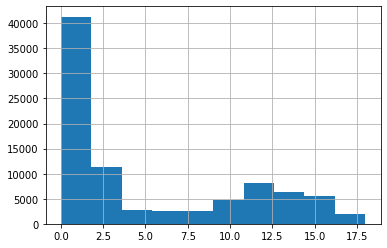

In [156]:
data['Var5'].hist()

In [157]:
data['Var5_Positive'] = (data['Var5'] > 0).astype(int)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Zmienna **Var1**

In [158]:
data['Var1'].isna().sum()

0

In [159]:
data['Var1'].value_counts()

HBXX    59252
HBXC     9005
HBXB     4472
HAXA     2909
HBXA     2112
HAXB     2011
HBXD     1962
HAXC     1534
HBXH      969
HCXF      721
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [160]:
CATEGORICAL_FEATURES.append('Var1')

Zmienna **Loan_Amount_Submitted**

In [161]:
data['Loan_Amount_Submitted'].isna().sum()

34578

In [162]:
data['Missing_Loan_Amount_Submitted'] = data['Loan_Amount_Submitted'].isna().astype(int)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


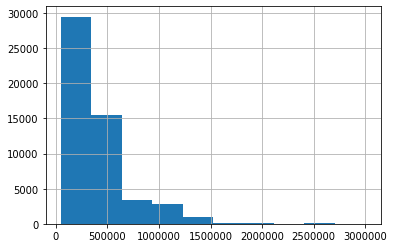

In [163]:
data['Loan_Amount_Submitted'].hist()

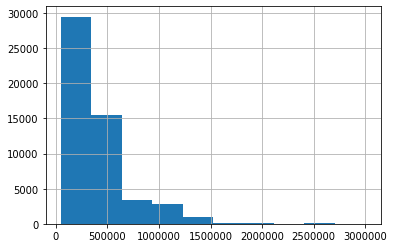

In [164]:
data['Loan_Amount_Submitted'].hist()

In [165]:
data.loc[data['Loan_Amount_Submitted'].isna(), 'Loan_Amount_Submitted'] = 0

In [179]:
data['Loan_Amount_Diff'] = data['Loan_Amount_Applied'] - data['Loan_Amount_Submitted']
data['Loan_Amount_Diff'] = data['Loan_Amount_Diff'].apply(lambda x: max(x, 0))

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
data['Loan_Amount_Diff']

0         300000.0
1              0.0
2         150000.0
3          80000.0
4              0.0
           ...    
87015    1000000.0
87016          0.0
87017          0.0
87018          0.0
87019          0.0
Name: Loan_Amount_Diff, Length: 86949, dtype: float64

In [181]:
data['Loan_Amount_Submitted_Log'] = np.log10(data['Loan_Amount_Submitted'] + 1)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Zmienna **Loan_Tenure_Submitted**

In [182]:
data['Loan_Tenure_Submitted'].isna().sum()

34578

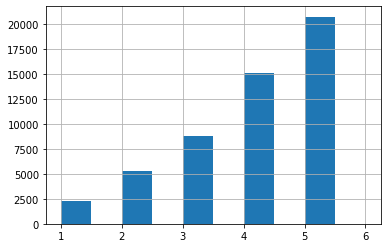

In [183]:
data['Loan_Tenure_Submitted'].hist()

In [185]:
data.loc[data['Loan_Tenure_Submitted'].isna(), 'Loan_Tenure_Submitted'] = 0

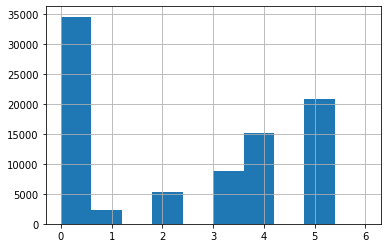

In [186]:
data['Loan_Tenure_Submitted'].hist()

In [187]:
data['Missing_Loan_Tenure_Submitted'] = (data['Loan_Amount_Submitted'] == 0).astype(int)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
data['Missing_Loan_Tenure_Submitted'] 

0        1
1        0
2        0
3        0
4        0
        ..
87015    1
87016    0
87017    0
87018    0
87019    0
Name: Missing_Loan_Tenure_Submitted, Length: 86949, dtype: int32

Zmienna **Interest_Rate**

In [189]:
data['Interest_Rate'].isna().sum()

59252

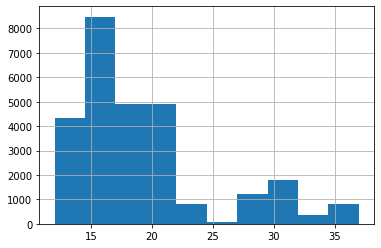

In [191]:
data['Interest_Rate'].hist()

In [192]:
data['Is_Interest_Rate'] = (~data['Interest_Rate'].isna()).astype(int)

C:\Users\Waldemar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
data.drop('Interest_Rate', axis=1, inplace=True)

C:\Users\Waldemar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [194]:
data.drop('Processing_Fee', axis=1, inplace=True)
data.drop('EMI_Loan_Submitted', axis=1, inplace=True)

Pozostałe zmienne

In [195]:
data['Filled_Form'].isna().sum()

0

In [196]:
data['Filled_Form']

0        N
1        N
2        N
3        N
4        N
        ..
87015    N
87016    Y
87017    N
87018    N
87019    N
Name: Filled_Form, Length: 86949, dtype: object

In [197]:
CATEGORICAL_FEATURES.append('Filled_Form')

In [201]:
data['Device_Type'].isna().sum()

0

In [202]:
CATEGORICAL_FEATURES.append('Device_Type')

In [203]:
data['Var2']

0        G
1        G
2        B
3        B
4        B
        ..
87015    G
87016    G
87017    G
87018    G
87019    G
Name: Var2, Length: 86949, dtype: object

In [204]:
CATEGORICAL_FEATURES.append('Var2')

In [206]:
data['Source'].value_counts()  # do przetworzenia 

S122    38500
S133    29884
S159     5599
S143     4330
S127     1931
S137     1724
S134     1301
S161      769
S151      720
S157      649
S153      494
S156      308
S144      299
S158      208
S123       73
S141       57
S162       36
S124       24
S160       11
S150       10
S155        4
S129        3
S139        3
S138        3
S136        3
S135        2
S140        1
S125        1
S130        1
S154        1
Name: Source, dtype: int64

In [207]:
CATEGORICAL_FEATURES.append('Source')

In [208]:
data['Var4']

0        1
1        3
2        1
3        3
4        3
        ..
87015    3
87016    5
87017    3
87018    3
87019    4
Name: Var4, Length: 86949, dtype: int64

In [209]:
CATEGORICAL_FEATURES.append('Var4')

In [210]:
data.drop('ID', axis=1, inplace=True)
data.drop('LoggedIn', axis=1, inplace=True)

C:\Users\Waldemar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [170]:
# temp = pd.to_datetime(data['Lead_Creation_Date'])
# temp
# (temp[2] - temp[22]).days

In [217]:
continous_features = data.drop(CATEGORICAL_FEATURES, axis=1, inplace=False)
continous_names = continous_features.columns.tolist()
continous_names.remove('Disbursed')

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [219]:
col_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), continous_names)
],
remainder = 'passthrough')

In [220]:
dataset = pd.get_dummies(data=data, columns=CATEGORICAL_FEATURES, drop_first=True)

In [221]:
dataset

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Disbursed,Monthly_Income_Log,Age,...,Source_S160,Source_S161,Source_S162,Var4_1,Var4_2,Var4_3,Var4_4,Var4_5,Var4_6,Var4_7
0,20000,300000.0,5.0,0.0,0,0.0,0.0,0,4.301052,37,...,0,0,0,1,0,0,0,0,0,0
1,35000,200000.0,2.0,0.0,13,200000.0,2.0,0,4.544080,30,...,0,0,0,0,0,1,0,0,0,0
2,22500,600000.0,4.0,0.0,0,450000.0,4.0,0,4.352202,34,...,0,0,0,1,0,0,0,0,0,0
3,35000,1000000.0,5.0,0.0,10,920000.0,5.0,0,4.544080,28,...,0,0,0,0,0,1,0,0,0,0
4,100000,500000.0,2.0,25000.0,17,500000.0,2.0,0,5.000004,31,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,71901,1000000.0,5.0,14500.0,9,0.0,0.0,0,4.856741,46,...,0,0,0,0,0,1,0,0,0,0
87016,16000,0.0,0.0,0.0,1,240000.0,4.0,0,4.204147,25,...,0,0,0,0,0,0,0,1,0,0
87017,118000,0.0,0.0,0.0,8,1200000.0,4.0,0,5.071886,43,...,0,0,0,0,0,1,0,0,0,0
87018,98930,800000.0,5.0,13660.0,18,800000.0,5.0,0,4.995332,38,...,0,0,0,0,0,1,0,0,0,0


In [222]:
X = col_transformer.fit_transform(dataset.drop('Disbursed', axis=1))

In [224]:
X.shape

(86949, 112)

In [225]:
y = dataset['Disbursed']

In [226]:
y.shape

(86949,)

In [231]:
def financial_score(y_true, y_pred):
    y_true = y_true.ravel()
    y_pred = y_pred.ravel()

    prediction_cost = y_pred.sum() * 100
    good_predictions_gain = (y_pred & y_true).sum() * 1000

    return good_predictions_gain - prediction_cost

In [232]:
financial_score(np.array([0, 0, 0, 1, 1]),
                np.array([1, 0, 0, 1, 1]))

1700